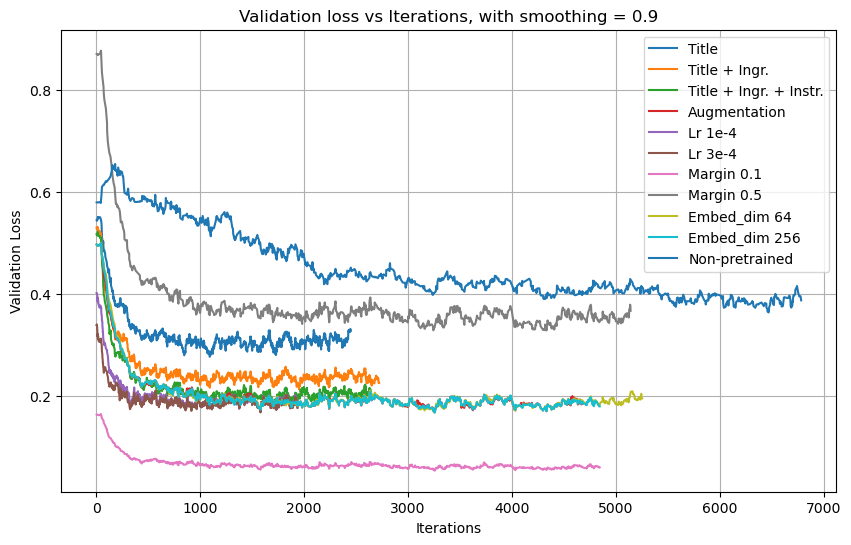

In [35]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use glob to get all CSV files in the directory
file_paths = glob.glob("*.csv")

# Load CSV files into Pandas DataFrame
dfs = [pd.read_csv(file_path) for file_path in file_paths]

name_dict = {"Nov24_11-04-40_n-62-20-5.csv": "Non-pretrained",
            "Nov23_18-19-30_n-62-20-5.csv": "Title",
            "Nov23_18-27-54_n-62-20-15.csv": "Title + Ingr.",
            "Nov23_18-33-31_n-62-11-15.csv": "Title + Ingr. + Instr.",
            "Nov23_19-39-12_n-62-20-5.csv": "Augmentation",
            "Nov23_20-08-20_n-62-20-15.csv": "Lr 1e-4",
            "Nov23_20-12-06_n-62-20-12.csv": "Lr 3e-4",
            "Nov23_20-37-50_n-62-20-6.csv": "Margin 0.1",
            "Nov23_21-42-21_n-62-20-15.csv": "Margin 0.5",
            "Nov23_21-56-47_n-62-20-12.csv": "Embed_dim 64",
            "Nov23_23-40-54_n-62-20-5.csv": "Embed_dim 256"}
            


# Specify the column containing validation loss and iteration information
loss_column = "Value"
iteration_column = "Step"

# Set the window size for moving average (adjust as needed)
window_size = 100

smoothing_factor = 0.9

# Create a plot with smoothing
plt.figure(figsize=(10, 6))

# for df, file_path in zip(dfs, file_paths):
#     # Calculate the moving average
#     smoothed_loss = df[loss_column].rolling(window=window_size, min_periods=1).mean()

#     # Plot the smoothed data
#     plt.plot(df[iteration_column], smoothed_loss, label=file_path)

for df, file_path in zip(dfs, file_paths):
    # Apply exponential smoothing
    smoothed_loss = df[loss_column].ewm(alpha=1 - smoothing_factor, adjust=False).mean()

    # Plot the smoothed data
    plt.plot(df[iteration_column], smoothed_loss, label=name_dict[file_path])

# Set plot labels and title
plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.title(f"Validation loss vs Iterations, with smoothing = {smoothing_factor}")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
for df in dfs:
    print(len(df))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [21]:
len(list(dfs[0]['Wall time']))

1000